**NAIVE BAYES / KNN / CAT BOOST**

In [128]:
#Libraries importation
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [129]:
#Import df
data=pd.read_csv("train.csv")
#Drop first column as "ID"
data.drop('Unnamed: 0', axis=1, inplace=True)

data.head(2)

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
0,"Mon, 6 Nov 2017 11:13:45 +0100",reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027,2
1,"Wed, 14 Feb 2018 11:00:16 -0000",edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961,1


**Data Preprocessing**

In [130]:
#Remove missing values (easier)
data= data.dropna(axis=0)

data.shape

(76639, 13)

In [131]:
#Dealing with outliers

data= data.drop(data[data.urls > 1000].index)
data= data.drop(data[data.images > 1000].index)

data.shape

(76625, 13)

In [132]:
#Reducing the size of categorical variables

#We arbitraly choose to keep only the 50th more used org value 
top50 = data["org"].value_counts()[:50]
data["org"]=data["org"].apply(lambda x: "other" if not x  in top50 else x)

#We arbitraly choose to keep only the 30th more used tldvalue
top50 = data["tld"].value_counts()[:50]
data["tld"]=data["tld"].apply(lambda x: "other" if not x  in top50 else x)

**Modeling**

Naive Bayes (just numerical features)

In [133]:
from sklearn.model_selection import train_test_split

num_features = data.drop(['date','label', 'tld', 'org','mail_type'], axis=1)
#Split into train,test df
X_train, X_test, y_train, y_test = train_test_split(num_features, data["label"], test_size=0.1)

In [134]:
from sklearn.naive_bayes import MultinomialNB

#Train Naive_Bayes model
classifier= MultinomialNB().fit(X_train, y_train)

In [135]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Result on train data
pred = classifier.predict(X_train)
print(classification_report(y_train,pred),"\n")
print("Confusion Matrix:\n ",confusion_matrix(y_train,pred),"\n")
print("Accuracy : ",accuracy_score(y_train,pred))


              precision    recall  f1-score   support

           0       0.25      0.25      0.25     14896
           1       0.75      0.02      0.03     31834
           2       0.26      0.27      0.27      7678
           3       0.38      0.15      0.21      9506
           4       0.01      0.06      0.01       283
           5       0.02      0.30      0.04        91
           6       0.00      0.52      0.00       135
           7       0.21      0.30      0.25      4539

    accuracy                           0.13     68962
   macro avg       0.23      0.23      0.13     68962
weighted avg       0.49      0.13      0.14     68962
 

Confusion Matrix:
  [[ 3728    52  1126   145   662   313  8045   825]
 [ 7214   511  3361  2141  1194   569 14050  2794]
 [ 1309    10  2080    42   323    65  2483  1366]
 [ 2217   102    35  1406   216   219  5212    99]
 [   25     0    49     0    18     8   124    59]
 [   17     7    12    12     1    27    14     1]
 [   35     0     2  

In [136]:
#Result on test data
pred = classifier.predict(X_test)
print(classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred),"\n")
print("Accuracy",accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.21      0.23      0.22      1587
           1       0.71      0.01      0.02      3601
           2       0.28      0.30      0.29       872
           3       0.39      0.15      0.22      1052
           4       0.01      0.08      0.01        26
           5       0.02      0.50      0.04         6
           6       0.00      0.62      0.01        16
           7       0.21      0.30      0.25       503

    accuracy                           0.13      7663
   macro avg       0.23      0.27      0.13      7663
weighted avg       0.48      0.13      0.13      7663
 

Confusion Matrix [[ 366    5  121    6   80   25  889   95]
 [ 882   36  398  234  126   57 1562  306]
 [ 135    2  260    6   36   13  274  146]
 [ 262    8    4  159   18   32  556   13]
 [   3    0    2    0    2    1   11    7]
 [   0    0    1    0    0    3    2    0]
 [   2    0    1    0    0    0   10    3]
 [  58    0  130    0   50   

**Modeling**

Naive Bayes (with dummy variables)

In [137]:
#Create Dummy Variables

all_type=pd.get_dummies(data["mail_type"])

all_type["text/html"] = all_type["text/html"]+all_type["text/html "]+all_type["Text/Html"]
all_type=all_type.drop(["text/html ","Text/Html"], axis=1)

all_type["multipart/mixed"] = all_type["multipart/mixed"]+all_type["Multipart/Mixed"]
all_type=all_type.drop("Multipart/Mixed", axis=1)

all_org=pd.get_dummies(data["org"])
all_tld=pd.get_dummies(data["tld"])

#Merge data

input=data.drop(['date','org','mail_type','tld','label'], axis=1)
input=pd.concat([input,all_type,all_org,all_tld],axis=1)

target=data["label"]

In [138]:
from sklearn.model_selection import train_test_split

#Split into train,test df
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.1)

In [139]:
from sklearn.naive_bayes import MultinomialNB

#Train Naive_Bayes model
classifier= MultinomialNB().fit(X_train, y_train)

In [140]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Result on train data
pred = classifier.predict(X_train)
print(classification_report(y_train,pred),"\n")
print("Confusion Matrix:\n ",confusion_matrix(y_train,pred),"\n")
print("Accuracy : ",accuracy_score(y_train,pred))


              precision    recall  f1-score   support

           0       0.28      0.27      0.28     14841
           1       0.71      0.02      0.03     31843
           2       0.34      0.40      0.37      7687
           3       0.39      0.15      0.21      9521
           4       0.01      0.12      0.02       277
           5       0.02      0.38      0.05        87
           6       0.00      0.54      0.00       135
           7       0.45      0.55      0.50      4571

    accuracy                           0.17     68962
   macro avg       0.28      0.30      0.18     68962
weighted avg       0.51      0.17      0.18     68962
 

Confusion Matrix:
  [[ 4005    79  1310   110   303   338  8302   394]
 [ 6787   501  3758  2096  2294   651 13476  2280]
 [ 1184     9  3099    45   236    89  2592   433]
 [ 1922   110    29  1417   977   237  4816    13]
 [   23     0    92     0    34     9   119     0]
 [    7     6    15     9     0    33    17     0]
 [   31     0    28  

In [141]:
#Result on test data
pred = classifier.predict(X_test)
print(classification_report(y_test,pred),"\n")
print("Confusion Matrix",confusion_matrix(y_test,pred),"\n")
print("Accuracy",accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.28      0.27      0.28      1642
           1       0.73      0.02      0.03      3592
           2       0.36      0.40      0.38       863
           3       0.34      0.15      0.20      1037
           4       0.01      0.16      0.02        32
           5       0.02      0.30      0.04        10
           6       0.00      0.56      0.01        16
           7       0.45      0.59      0.51       471

    accuracy                           0.17      7663
   macro avg       0.27      0.31      0.18      7663
weighted avg       0.52      0.17      0.18      7663
 

Confusion Matrix [[ 448    8  130   13   41   31  919   52]
 [ 744   56  399  274  287   77 1519  236]
 [ 127    0  345    4   33    9  290   55]
 [ 220   12    2  152  105   36  508    2]
 [   2    0   11    0    5    0   14    0]
 [   1    1    2    3    0    3    0    0]
 [   2    0    4    0    1    0    9    0]
 [  28    0   71    0    7   

**KNN (just numerical features)**

In [142]:
from sklearn.model_selection import train_test_split

num_features = data.drop(['date','label', 'tld', 'org','mail_type'], axis=1)
#Split into train,test df
X_train, X_test, y_train, y_test = train_test_split(num_features, data["label"], test_size=0.1)

In [143]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


#Find the optimal value for k 
k_range =range(1,20)
scores={}
scores_list=[]
for k in k_range:
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred= knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

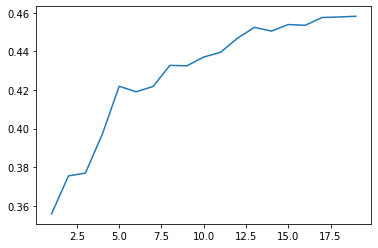

In [144]:
#Plot accuracy:
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)

**KNN all features**

In [145]:
from sklearn.model_selection import train_test_split

#Split into train,test df
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.1)

In [146]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


#Find the optimal value for k 
k_range =range(1,20)
scores={}
scores_list=[]
for k in k_range:
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred= knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

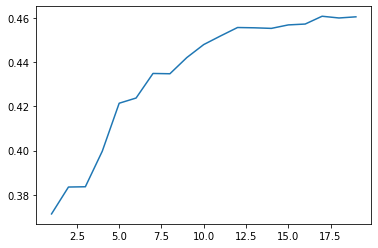

In [147]:
#Plot accuracy:
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)

**CAT BOOST**

In [180]:
#splitting dataset for train and test

label = data['label']
train = data.drop('label', axis=1)
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.1, random_state=2)

In [182]:
#create and run the model

from catboost import CatBoostClassifier, Pool

#indicating which features are not categorical
categorical_features_indices = np.where(train.dtypes != np.float)[0]
train_pool = Pool(x_train, y_train, cat_features=categorical_features_indices)

#actual model
cat = CatBoostClassifier(iterations=80, learning_rate=0.1, depth=10, one_hot_max_size=1500)
cat.fit(train_pool)


0:	learn: 1.8590732	total: 696ms	remaining: 55s
1:	learn: 1.7114794	total: 1.34s	remaining: 52.1s
2:	learn: 1.5971071	total: 1.94s	remaining: 49.8s
3:	learn: 1.5058869	total: 2.57s	remaining: 48.9s
4:	learn: 1.4311963	total: 3.41s	remaining: 51.1s
5:	learn: 1.3727808	total: 4.11s	remaining: 50.7s
6:	learn: 1.3210369	total: 4.74s	remaining: 49.5s
7:	learn: 1.2720684	total: 5.36s	remaining: 48.3s
8:	learn: 1.2322384	total: 5.9s	remaining: 46.6s
9:	learn: 1.1957505	total: 6.48s	remaining: 45.4s
10:	learn: 1.1643983	total: 7.06s	remaining: 44.3s
11:	learn: 1.1388106	total: 7.61s	remaining: 43.1s
12:	learn: 1.1155392	total: 8.2s	remaining: 42.3s
13:	learn: 1.0942773	total: 8.76s	remaining: 41.3s
14:	learn: 1.0765836	total: 9.32s	remaining: 40.4s
15:	learn: 1.0584938	total: 9.89s	remaining: 39.6s
16:	learn: 1.0299627	total: 10.6s	remaining: 39.2s
17:	learn: 1.0065899	total: 11.2s	remaining: 38.7s
18:	learn: 0.9853207	total: 11.8s	remaining: 37.9s
19:	learn: 0.9666383	total: 12.4s	remaining: 

In [183]:
from sklearn.metrics import accuracy_score

#make prediction for evaluation
pred_y_train = cat.predict(x_train)
pred_y_test = cat.predict(x_test)

#get accuracy
print('Accuracy on training set ' + str(accuracy_score(y_train, pred_y_train)))
print('Accuracy on test set ' + str(accuracy_score(y_test, pred_y_test)))

Accuracy on training set 0.3884168092572721
Accuracy on test set 0.7166905911522903


**Predictions using CAT BOOSTER**

In [207]:
#Load the dataframe
test=pd.read_csv("test.csv")
test.drop(columns=test.columns[0], axis=1, inplace=True)
test.head(2)

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body
0,"Wed, 1 Nov 2017 15:51:21 +0530",iiitd,ac.in,0,0,multipart/alternative,0,12,1,0,20.0,4505
1,"Thu, 05 Mar 2015 20:47:22 -0500",notifications,freelancer.com,0,0,multipart/alternative,7,49,1,0,49.0,32949


In [176]:
#detect that there is 80 missing values (in mail_type)
test.isna().sum()

date                   0
org                 1536
tld                 1536
ccs                    0
bcced                  0
mail_type             80
images                 0
urls                   0
salutations            0
designation            0
chars_in_subject       6
chars_in_body          0
dtype: int64

In [177]:
#Replace Na by the most common value
test["mail_type"].fillna("multipart/alternative", inplace=True)

In [178]:
#Apply the same transformation on the test data
orgs = data["org"].unique()
test["org"]=test["org"].apply(lambda x: "other" if not x  in orgs else x)

tlds = data["tld"].unique()
test["tld"] = test["tld"].apply(lambda x: "other" if not x  in tlds else x)

In [184]:
#Run the model
categorical_features_indices = np.where(test.dtypes != np.float)[0]
evalu = Pool(data=test, cat_features=categorical_features_indices)

pred_y = cat.predict(evalu)

In [208]:
#Final output 
output=pd.DataFrame(pred_y,columns=['label'])
output.index.rename('Id', inplace=True)

output.to_csv("result.csv")